In [18]:
import pandas as pd

In [19]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))

from src.data_preparation_workflow import load_dataset, get_features_and_target, create_train_test_split


In [20]:
# Test the flow
path = "../data/cleaned_data/final_dataset.csv"

df = load_dataset(path)
print(f"Loaded data: {df.shape}")

X, y = get_features_and_target(df)
print(f"Features: {X.shape}, Target: {y.shape}")

X_train, X_test, y_train, y_test = create_train_test_split(X, y, stratify_by="Seniority")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Loaded data: (366, 12)
Features: (366, 11), Target: (366,)
Train: (292, 11), Test: (74, 11)


In [21]:
X_train

,Gender,Education Level,Seniority,Area,Role,Age,Years of Experience,noun_count,verb_count,adj_count,adv_count
119,Female,Bachelor's,Senior,Sales & Marketing,Management,42.0,17.0,34,15,7,4
243,Female,Bachelor's,Junior,Sales & Marketing,Support,30.0,2.0,25,11,5,2
242,Male,Master's,Director,Finance & Operations,Leadership,47.0,20.0,32,13,12,1
301,Male,Master's,Director,Sales & Marketing,Sales/Marketing,47.0,19.0,29,16,7,2
309,Female,Bachelor's,Junior,People & Support,Support,30.0,2.0,39,15,7,1
...,...,...,...,...,...,...,...,...,...,...,...
76,Female,Bachelor's,Senior,Finance & Operations,Management,50.0,22.0,25,14,12,1
241,Female,Bachelor's,Senior,Management,Support,41.0,11.0,29,13,11,2
11,Female,Bachelor's,Senior,People & Support,Management,48.0,18.0,33,14,12,0
189,Male,Bachelor's,Senior,Product & Design,Management,34.0,7.0,32,13,7,4


---

# Dummy model

In [22]:
from src import dummy_model

In [23]:
# Create and train dummy model
dummy = dummy_model(strategy='median')
dummy.fit(X_train, y_train)

In [24]:
metrics = dummy.evaluate(X_test, y_test)
metrics

,metric,point_estimate,95%_CI
0,RMSE,50897.352982,"(42610.852, 60946.921)"
1,MAE,41891.891892,"(35633.475, 52152.542)"
2,R2,-0.020987,"(-0.121, -0.000)"


In [25]:
# Model info
info = dummy.get_model_info()
print(f"Model info: {info}")

Model info: {'model_type': 'dummy_model', 'is_fitted': True, 'model_params': {'strategy': 'median'}}


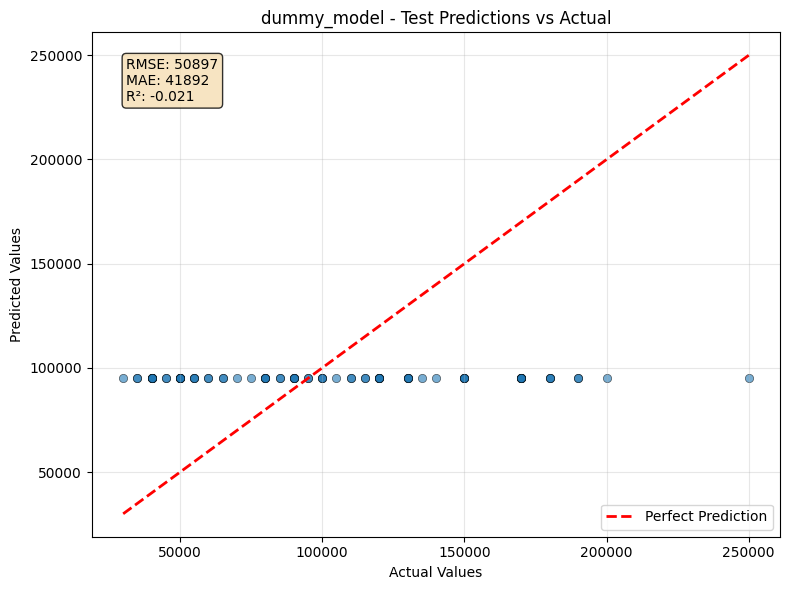

In [26]:
# Evaluate and plot
#print("Dummy Model Metrics:", dummy.evaluate(X_test, y_test))
dummy.plot_predictions(X_test, y_test, 'Test')


---

# Linear Regression

- Approaches. 
  - Ordinary Least Squares (OLS)
  - Gradient Descent
- Assumptions.
    - Linearity
    - Independence
    - Homoscedasticity
    - Normality of errors
- Evaluation metrics.
    - R-squared
    - Adjusted R-squared
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - Mean Absolute Error (MAE)
- Regularization.
    - Lasso Regression (L1 regularization)
    - Ridge Regression (L2 regularization)



In [27]:
from src.models import LinearModel

### Basic OLS

In [28]:
# Basic OLS without feature selection
ols_basic = LinearModel(algorithm='ols')
ols_basic.fit(X_train, y_train)

After encoding: 27 features
  - Numerical features (scaled): 6
  - One-hot features (not scaled): 21
After k-best selection: 27 features
Removed feature_0 (VIF: 142.11)
Removed feature_12 (VIF: 28.11)
Removed feature_2 (VIF: 15.20)
Removed feature_1 (VIF: 14.26)
Removed feature_3 (VIF: 11.67)
Removed feature_4 (VIF: 6.43)
After VIF check: 21 features


In [29]:
ols_basic.list_methods()

Available public methods:
  1. evaluate()
  2. fit()
  3. get_api_info()
  4. get_feature_importance()
  5. get_feature_names()
  6. get_model_info()
  7. get_training_metrics()
  8. list_methods()
  9. load()
  10. plot_predictions()
  11. predict()
  12. predict_api_input()
  13. save()
  14. set_feature_names()
  15. set_training_metrics()


In [30]:
# Evaluate
metrics_ols = ols_basic.evaluate(X_test, y_test)
metrics_ols


,metric,point_estimate,95%_CI
0,RMSE,22742.421211,"(16639.708, 31032.684)"
1,MAE,16157.206212,"(12819.693, 20485.137)"
2,R2,0.796153,"(0.685, 0.870)"


In [31]:
# Model info
info = ols_basic.get_model_info()
print(f"Features: {info['n_features_after_encoding']} → {info['n_features_final']}")

Features: 27 → 21


In [32]:
feature_imp = ols_basic.get_feature_importance()
feature_imp


,feature,coefficient,abs_coefficient
3,cat__Education Level_PhD,52118.228613,52118.228613
17,cat__Role_Leadership,48381.348693,48381.348693
5,cat__Seniority_Junior,-46552.776458,46552.776458
19,cat__Role_Sales/Marketing,44815.661276,44815.661276
4,cat__Seniority_Director,25441.559303,25441.559303
18,cat__Role_Management,14405.259107,14405.259107
2,cat__Education Level_Master's,13822.022604,13822.022604
16,cat__Role_Individual Contributor,-8644.393008,8644.393008
9,cat__Area_Other,-8405.113537,8405.113537
8,cat__Area_Management,-6773.907735,6773.907735


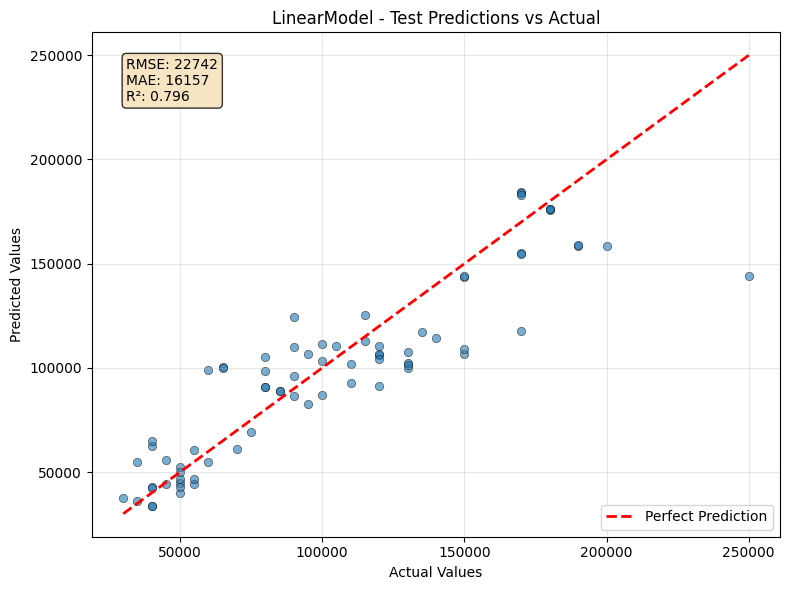

In [33]:
ols_basic.plot_predictions(X_test, y_test, 'Test')

In [34]:
ols_basic.save("OLS_basic")

Model saved successfully to /home/frank/maestria_mcd/PwC/pwc_challenge/models/OLS_basic.pkl


---

### SGD Regression


In [35]:
sgd_reg = LinearModel(algorithm='sgd')
sgd_reg.fit(X_train, y_train)

After encoding: 27 features
  - Numerical features (scaled): 6
  - One-hot features (not scaled): 21
After k-best selection: 27 features
Removed feature_0 (VIF: 142.11)
Removed feature_12 (VIF: 28.11)
Removed feature_2 (VIF: 15.20)
Removed feature_1 (VIF: 14.26)
Removed feature_3 (VIF: 11.67)
Removed feature_4 (VIF: 6.43)
After VIF check: 21 features


In [36]:
# Evaluate
metrics_sgd = sgd_reg.evaluate(X_test, y_test)
metrics_sgd


,metric,point_estimate,95%_CI
0,RMSE,23518.594064,"(16655.235, 31062.453)"
1,MAE,16752.630824,"(13237.667, 19967.858)"
2,R2,0.782002,"(0.675, 0.871)"


In [37]:
feature_imp_sgd = sgd_reg.get_feature_importance()
feature_imp_sgd

,feature,coefficient,abs_coefficient
3,cat__Education Level_PhD,53531.086348,53531.086348
5,cat__Seniority_Junior,-46208.585274,46208.585274
17,cat__Role_Leadership,43315.431039,43315.431039
4,cat__Seniority_Director,30005.205152,30005.205152
19,cat__Role_Sales/Marketing,28763.932670,28763.932670
2,cat__Education Level_Master's,14659.179644,14659.179644
18,cat__Role_Management,12451.476244,12451.476244
13,cat__Area_Software/data,10473.855871,10473.855871
16,cat__Role_Individual Contributor,-8781.798297,8781.798297
10,cat__Area_People & Support,6701.873043,6701.873043


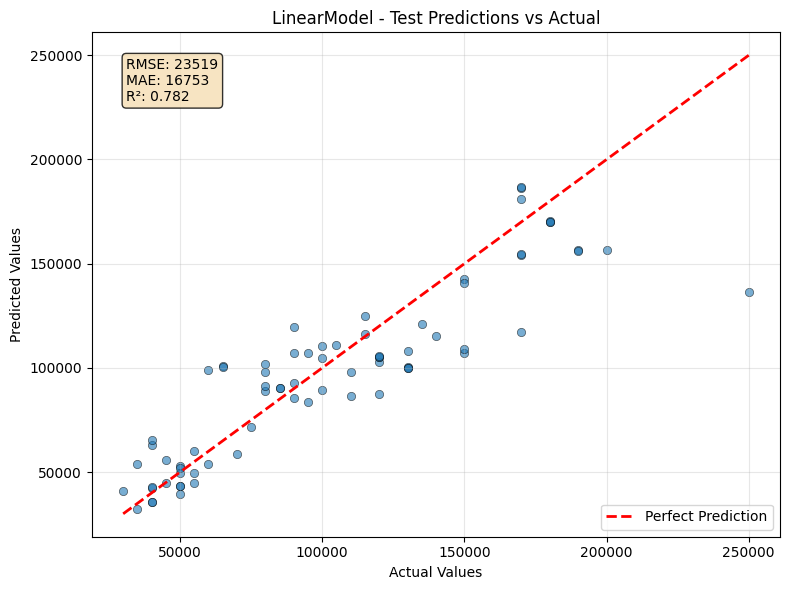

In [38]:
sgd_reg.plot_predictions(X_test, y_test, 'Test')

In [39]:
sgd_reg.save("SGD_Regression")

Model saved successfully to /home/frank/maestria_mcd/PwC/pwc_challenge/models/SGD_Regression.pkl


---

### Lasso Regression

In [40]:
lasso_reg = LinearModel(algorithm='lasso', alpha = 100, k_best=15)
lasso_reg.fit(X_train, y_train)

After encoding: 27 features
  - Numerical features (scaled): 6
  - One-hot features (not scaled): 21
Selected 15 best features from 27 features
After k-best selection: 15 features
Removed feature_0 (VIF: 133.26)
Removed feature_8 (VIF: 15.91)
Removed feature_1 (VIF: 10.52)
Removed feature_2 (VIF: 7.07)
After VIF check: 11 features


In [41]:
metrics_lasso = lasso_reg.evaluate(X_test, y_test)
metrics_lasso


,metric,point_estimate,95%_CI
0,RMSE,23538.624446,"(17436.680, 29483.142)"
1,MAE,16780.131903,"(13398.500, 20924.143)"
2,R2,0.781630,"(0.676, 0.876)"


In [42]:
# Model info
info = lasso_reg.get_model_info()
print(f"Features: {info['n_features_after_encoding']} → {info['n_features_final']}")

Features: 27 → 11


In [43]:
feature_imp_lasso = lasso_reg.get_feature_importance()
feature_imp_lasso

,feature,coefficient,abs_coefficient
4,cat__Seniority_Junior,-50092.206352,50092.206352
2,cat__Education Level_PhD,44590.954249,44590.954249
8,cat__Role_Leadership,40684.787242,40684.787242
9,cat__Role_Sales/Marketing,28321.441345,28321.441345
3,cat__Seniority_Director,27130.896683,27130.896683
7,cat__Role_Individual Contributor,-14059.563678,14059.563678
1,cat__Education Level_Master's,12025.591327,12025.591327
10,cat__Role_Support,-10973.221590,10973.221590
5,cat__Area_Software/data,5841.816705,5841.816705
6,cat__Role_Engineer,-1961.936305,1961.936305


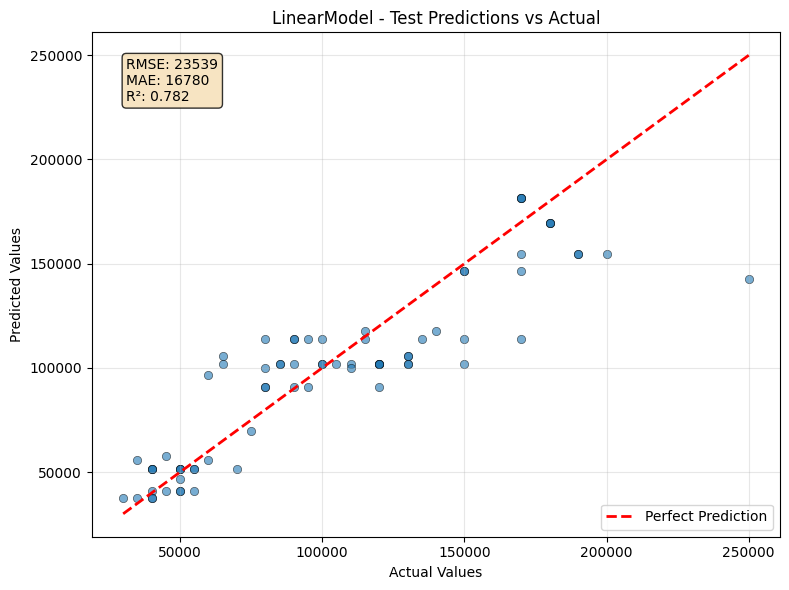

In [44]:
lasso_reg.plot_predictions(X_test, y_test, 'Test')

In [45]:
lasso_reg.get_model_info()

{'model_type': 'LinearModel',
 'is_fitted': True,
 'model_params': {'alpha': 100,
  'algorithm': 'lasso',
  'vif_threshold': 5.0,
  'k_best': 15},
 'n_features_after_encoding': 27,
 'n_features_after_kbest': 15,
 'n_features_final': 11,
 'n_numerical_features_scaled': 6,
 'n_onehot_features_not_scaled': 21,
 'features_removed_by_kbest': 12,
 'features_removed_by_vif': 4}

In [46]:
lasso_reg.save("Lasso_Regression")

Model saved successfully to /home/frank/maestria_mcd/PwC/pwc_challenge/models/Lasso_Regression.pkl


---

# Decision Tree with Cross-Validation

Testing the new cross-validation functionality in DecisionTree model.

In [47]:
from src.models import DecisionTree

### Regular Training

In [48]:
# Create decision tree with ordinal mappings
ordinal_mappings = {
    'Education Level': ["Bachelor's", "Master's", 'PhD'],
    'Seniority': ['Junior', 'Senior', 'Principal','Director', 'C-level']
}

dt_regular = DecisionTree(normalize=True, ordinal_mappings=ordinal_mappings, max_depth=10)


In [49]:
dt_regular.list_methods()

Available public methods:
  1. cross_validate()
  2. evaluate()
  3. fit()
  4. get_api_info()
  5. get_feature_importance()
  6. get_feature_names()
  7. get_model_info()
  8. get_training_metrics()
  9. list_methods()
  10. load()
  11. optimize()
  12. plot_predictions()
  13. predict()
  14. predict_api_input()
  15. save()
  16. set_feature_names()
  17. set_training_metrics()


In [50]:
dt_regular.fit(X_train, y_train)

After preprocessing: 23 features
  - Ordinal encoded: ['Education Level', 'Seniority']
  - One-hot encoded: ['Gender', 'Area', 'Role']
  - Numerical features: 6
  - Features normalized


In [51]:
# Evaluate on test set
metrics_dt = dt_regular.evaluate(X_test, y_test)
metrics_dt

,metric,point_estimate,95%_CI
0,RMSE,19810.253577,"(14822.627, 24386.752)"
1,MAE,13638.288288,"(10058.711, 17076.455)"
2,R2,0.845329,"(0.741, 0.920)"


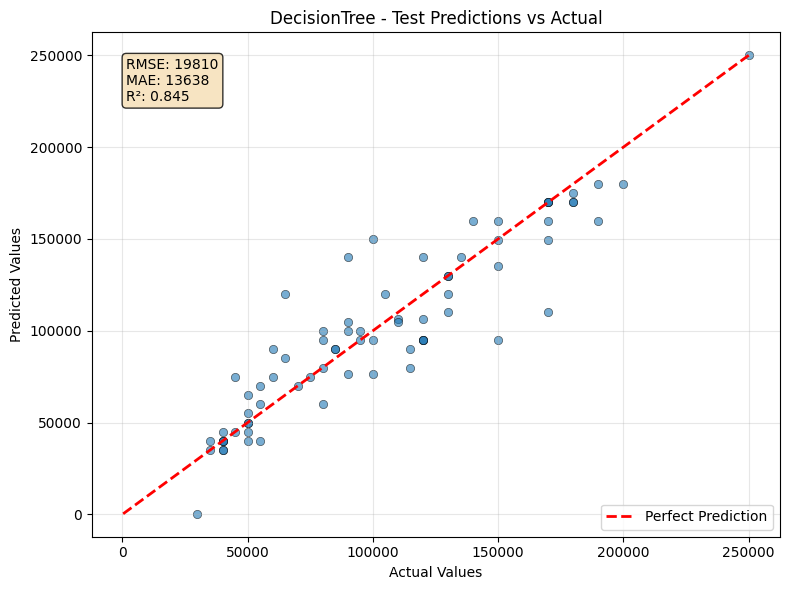

In [52]:
dt_regular.plot_predictions(X_test, y_test, 'Test')

### Cross-Validation

In [53]:
# Same model but using cross-validation with RMSE
cv_results = dt_regular.cross_validate(X_train, y_train, cv=5)

Cross-Validation Results (5-fold):
  RMSE: 18973.94 (±1304.35)
  Individual fold scores: ['20231.72', '20794.47', '18496.52', '17665.47', '17681.54']


In [54]:
# Compare with R² scoring
cv_results_r2 = dt_regular.cross_validate(X_train, y_train, cv=5, scoring='r2')
print(f"\nCV Results Summary:")
print(f"RMSE: {cv_results['mean_score']:.0f} (±{cv_results['std_score']:.0f})")
print(f"R²: {cv_results_r2['mean_score']:.3f} (±{cv_results_r2['std_score']:.3f})")

Cross-Validation Results (5-fold):
  R²: 0.84 (±0.04)
  Individual fold scores: ['0.84', '0.77', '0.87', '0.86', '0.85']

CV Results Summary:
RMSE: 18974 (±1304)
R²: 0.837 (±0.035)


### Grid Search

In [55]:
dt_regular.optimize(X_train, y_train)

Starting gridsearch for hyperparameter tuning...

Best score: 15513.49
Best params: {'regressor__ccp_alpha': 0.0, 'regressor__max_depth': 10, 'regressor__max_features': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 20}
Updated parameters: {'ccp_alpha': 0.0, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 20}
Model parameters updated with best found parameters.
You can now use fit() or cross_validate() with the optimized parameters.


,estimator,Pipeline(step...m_state=37))])
,param_grid,"{'regressor__ccp_alpha': [0.0, 0.01, ...], 'regressor__max_depth': [3, 5, ...], 'regressor__max_features': ['sqrt', 'log2', ...], 'regressor__min_samples_leaf': [1, 2, ...], ...}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('ord_Education Level', ...), ('ord_Seniority', ...), ...]"


In [56]:
dt_regular.fit(X_train, y_train)

After preprocessing: 23 features
  - Ordinal encoded: ['Education Level', 'Seniority']
  - One-hot encoded: ['Gender', 'Area', 'Role']
  - Numerical features: 6
  - Features normalized


In [57]:
dt_regular.evaluate(X_test, y_test)

,metric,point_estimate,95%_CI
0,RMSE,18210.861036,"(12961.912, 23595.657)"
1,MAE,12605.368624,"(9667.471, 16217.148)"
2,R2,0.869295,"(0.799, 0.926)"


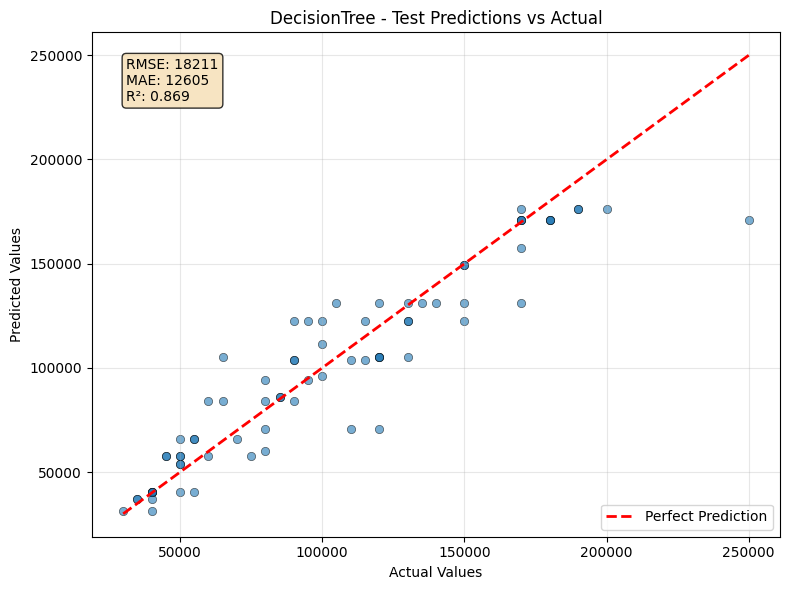

In [58]:
dt_regular.plot_predictions(X_test, y_test, 'Test')

In [59]:
dt_regular.get_feature_importance()

,feature,importance
2,num__Age,0.721887
3,num__Years of Experience,0.188523
1,ord_Seniority__Seniority,0.040512
0,ord_Education Level__Education Level,0.016492
19,cat__Role_Leadership,0.013252
8,cat__Gender_Male,0.005931
15,cat__Area_Software/data,0.005289
20,cat__Role_Management,0.004870
4,num__noun_count,0.002743
7,num__adv_count,0.000321


In [60]:
dt_regular.save("DecisionTree_GSopt")

Model saved successfully to /home/frank/maestria_mcd/PwC/pwc_challenge/models/DecisionTree_GSopt.pkl


---

# Random Forest

In [61]:
from src.models import RandomForest

In [62]:
rf = RandomForest(normalize=True, ordinal_mappings=ordinal_mappings, max_features="sqrt")

In [63]:
rf.get_model_info()

{'model_type': 'RandomForest',
 'is_fitted': False,
 'model_params': {'max_features': 'sqrt',
  'normalize': True,
  'ordinal_mappings': {},
  'random_state': 37,
  'max_depth': None,
  'min_samples_split': 2,
  'min_samples_leaf': 1}}

In [64]:
rf.fit(X_train, y_train)

After preprocessing: 27 features
  - Ordinal encoded: []
  - One-hot encoded: ['Gender', 'Education Level', 'Seniority', 'Area', 'Role']
  - Numerical features: 6


In [65]:
rf.list_methods()

Available public methods:
  1. cross_validate()
  2. evaluate()
  3. fit()
  4. get_api_info()
  5. get_feature_importance()
  6. get_feature_names()
  7. get_model_info()
  8. get_training_metrics()
  9. list_methods()
  10. load()
  11. optimize()
  12. plot_predictions()
  13. predict()
  14. predict_api_input()
  15. save()
  16. set_feature_names()
  17. set_training_metrics()


In [66]:
rf.evaluate(X_test, y_test)

,metric,point_estimate,95%_CI
0,RMSE,15108.938652,"(10107.032, 19199.545)"
1,MAE,9895.317568,"(7303.115, 12850.358)"
2,R2,0.910030,"(0.852, 0.953)"


In [67]:
rf.cross_validate(X_train, y_train, cv=5)

Cross-Validation Results (5-fold):
  RMSE: 12945.99 (±901.07)
  Individual fold scores: ['13175.31', '12899.93', '14504.24', '11901.48', '12249.00']


/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


{'cv_scores': array([13175.30516274, 12899.93430544, 14504.2391871 , 11901.48441444,
        12248.99660264]),
 'mean_score': np.float64(12945.991934473703),
 'std_score': np.float64(901.0703428873627),
 'score_name': 'RMSE',
 'cv_folds': 5}

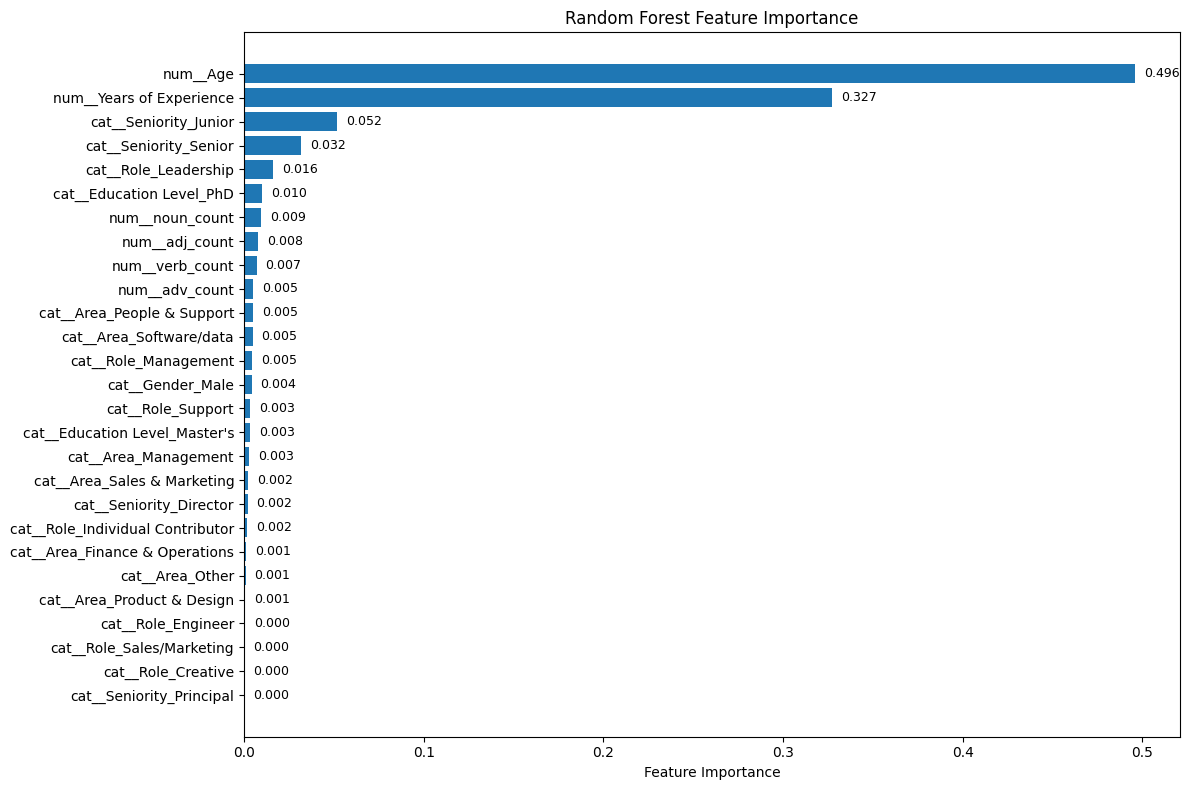

In [68]:
import matplotlib.pyplot as plt

# Get feature importance and create bar plot
feature_imp_rf = rf.get_feature_importance()

plt.figure(figsize=(12, 8))
plt.barh(feature_imp_rf['feature'], feature_imp_rf['importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # To show most important features at the top
plt.tight_layout()
# Add value labels to the bars
for i, v in enumerate(feature_imp_rf['importance']):
    plt.text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=9)

plt.show()

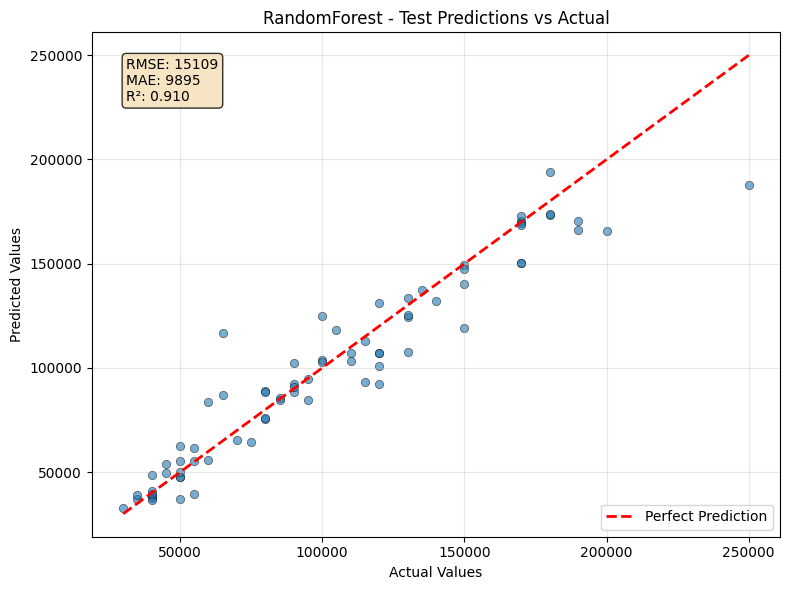

In [69]:
rf.plot_predictions(X_test, y_test, 'Test')

---

## Random forest drop Age

In [70]:
X_train_na = X_train.drop(columns=["Age","Years of Experience"], axis=1)

In [71]:
df_na = RandomForest(normalize=True, ordinal_mappings=ordinal_mappings, max_features="sqrt")

In [72]:
df_na.fit(X_train_na, y_train)

After preprocessing: 25 features
  - Ordinal encoded: []
  - One-hot encoded: ['Gender', 'Education Level', 'Seniority', 'Area', 'Role']
  - Numerical features: 4


In [73]:
df_na.evaluate(X_test, y_test)

,metric,point_estimate,95%_CI
0,RMSE,21934.564242,"(16414.720, 26514.676)"
1,MAE,15145.905405,"(11667.493, 18553.819)"
2,R2,0.810378,"(0.705, 0.887)"


In [74]:
df_na.get_feature_importance()

,feature,importance
8,cat__Seniority_Junior,0.542936
6,cat__Education Level_PhD,0.101053
21,cat__Role_Leadership,0.095021
10,cat__Seniority_Senior,0.084341
0,num__noun_count,0.031380
22,cat__Role_Management,0.024391
1,num__verb_count,0.024024
7,cat__Seniority_Director,0.018806
2,num__adj_count,0.017859
3,num__adv_count,0.008441


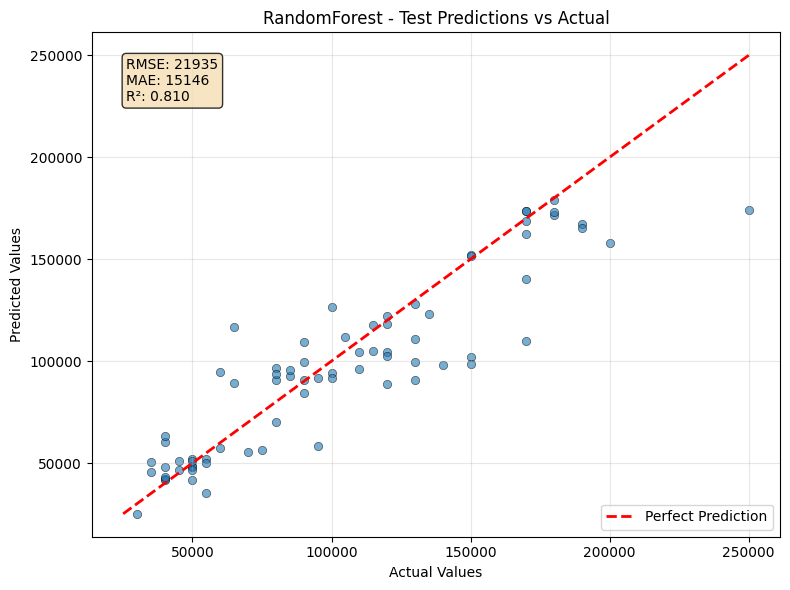

In [75]:
df_na.plot_predictions(X_test, y_test, 'Test')

---

## Random forest bayesian optimization

In [76]:
opt_study = rf.optimize(X_train, y_train)

[I 2025-06-22 10:37:50,172] A new study created in memory with name: no-name-9b549cdb-0e00-4072-aa9d-a531814e4a8f
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
[I 2025-06-22 10:37:50,268] Trial 0 finished with value: 16189.529285672459 and parameters: {'n_estimators': 100, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 16189.529285672459.
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
[I 2025-06-22 10:37:50,382] Trial 1 finished with value: 18440.58233180781 and parameters: {'n_estimators': 155, 'max_depth': 4, 'min_samples_spl

Best parameters: {'n_estimators': 171, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}
Best score: 13063.48
After preprocessing: 27 features
  - Ordinal encoded: []
  - One-hot encoded: ['Gender', 'Education Level', 'Seniority', 'Area', 'Role']
  - Numerical features: 6


In [77]:
rf.evaluate(X_test, y_test)

,metric,point_estimate,95%_CI
0,RMSE,16758.949768,"(11691.266, 20336.169)"
1,MAE,11317.048117,"(8289.682, 13708.295)"
2,R2,0.889306,"(0.834, 0.939)"


In [78]:
rf.get_model_info()

{'model_type': 'RandomForest',
 'is_fitted': True,
 'model_params': {'max_features': 'log2',
  'normalize': True,
  'ordinal_mappings': {},
  'random_state': 37,
  'max_depth': 10,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'n_estimators': 171}}

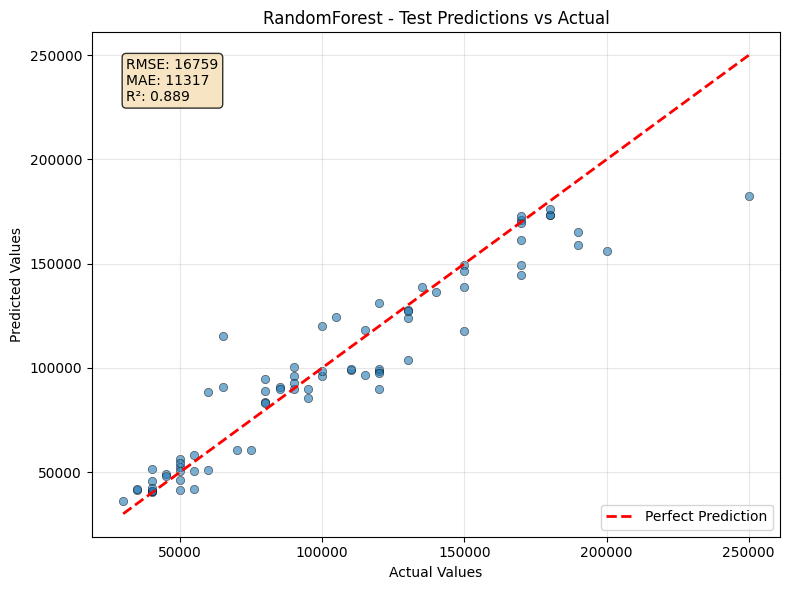

In [79]:
rf.plot_predictions(X_test, y_test, 'Test')

In [80]:
rf.save("RandomForest_BOopt")

Model saved successfully to /home/frank/maestria_mcd/PwC/pwc_challenge/models/RandomForest_BOopt.pkl
